In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import random
from matplotlib import pyplot as plt
%matplotlib inline


In [8]:
df = pd.read_csv('en.openfoodfacts.org.products.tsv',delimiter='\t',encoding='utf-8',low_memory=False)

In [9]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Data columns (total 163 columns):
code                                          356001 non-null object
url                                           356001 non-null object
creator                                       356024 non-null object
created_t                                     356024 non-null object
created_datetime                              356017 non-null object
last_modified_t                               356027 non-null object
last_modified_datetime                        356027 non-null object
product_name                                  338515 non-null object
generic_name                                  57714 non-null object
quantity                                      119285 non-null object
packaging                                     89959 non-null object
packaging_tags                                89959 non-null object
brands                                        326977 non-null o

Drop the rows where all the data is null

In [10]:
df.dropna(how='all',inplace=True)

Find duplicated data

In [11]:
df.loc[df.duplicated(),:]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g


Investigate how many columns have how much missing value

In [12]:
missing_value = df.isnull().sum()

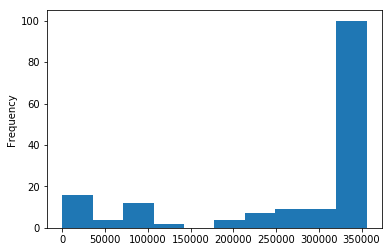

In [13]:
hist=missing_value.plot.hist()

Around 100 columns have less than 50000 non-null values. Those columns is probably not going to be useful for me to do any analysis with. I'm going to drop them. 

In [14]:
df.dropna(thresh=50000,axis=1,inplace=True)

In [15]:
df.shape

(356027, 60)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356027 entries, 0 to 356026
Data columns (total 60 columns):
code                                       356001 non-null object
url                                        356001 non-null object
creator                                    356024 non-null object
created_t                                  356024 non-null object
created_datetime                           356017 non-null object
last_modified_t                            356027 non-null object
last_modified_datetime                     356027 non-null object
product_name                               338515 non-null object
generic_name                               57714 non-null object
quantity                                   119285 non-null object
packaging                                  89959 non-null object
packaging_tags                             89959 non-null object
brands                                     326977 non-null object
brands_tags                       

Investigate the macronutrient groups (carbohydrates,proteins,fat)

In [17]:
ratio_df = pd.DataFrame({'product_name':df.product_name, 'fat_ratio':df.fat_100g/df.energy_100g,'carb_ratio':df.carbohydrates_100g/df.energy_100g,'protein_ratio':df.proteins_100g/df.energy_100g})
ratio_df = ratio_df.set_index('product_name')
ratio_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 356027 entries, Farine de blé noir to Sugar Free Drink Mix, Peach Tea
Data columns (total 3 columns):
carb_ratio       270664 non-null float64
fat_ratio        269245 non-null float64
protein_ratio    284476 non-null float64
dtypes: float64(3)
memory usage: 10.9+ MB


In [18]:
ratio_df.drop(ratio_df.index[np.isinf(ratio_df).any(1)],inplace=True)
ratio_df.dropna(thresh=1,inplace=True)

In [19]:
carb_ranked = ratio_df.sort_values('carb_ratio',ascending=False)
fat_ranked = ratio_df.sort_values('fat_ratio',ascending=False)
protein_ranked = ratio_df.sort_values('protein_ratio',ascending=False)

In [20]:
topfive_carb_food = list(carb_ranked.index.values)[0:5]
topfive_carb_food

['Pulpa de lulo congelada',
 'Himalaya Organic Raw Cacao Nibs',
 'Maismehl',
 'Spinach cheese tortellini',
 'Tortas cenceñas']

In [21]:
topfive_carb_food_detail = df.loc[df.product_name.isin(topfive_carb_food)]
topfive_carb_food_detail

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
21863,0024842112219,http://world-en.openfoodfacts.org/product/0024...,openfoodfacts-contributors,1504974252,2017-09-09T16:24:12Z,1505232816,2017-09-12T16:13:36Z,Spinach cheese tortellini,NaN,255 g,...,2.830,11.3,1.100000,0.434000,0.000028,0.0034,0.0943,0.00102,-3.0,-3.0
152005,0812907013652,http://world-en.openfoodfacts.org/product/0812...,openfoodfacts-contributors,1504930744,2017-09-09T04:19:04Z,1504933909,2017-09-09T05:11:49Z,Himalaya Organic Raw Cacao Nibs,cacao nibs,"5 Oz, 142 g",...,28.135,12.5,0.079375,0.031250,NaN,NaN,NaN,NaN,0.0,0.0
287538,4104420016767,http://world-en.openfoodfacts.org/product/4104...,openfood-ch-import,1486504789,2017-02-07T21:59:49Z,1487256884,2017-02-16T14:54:44Z,Maismehl,NaN,500 g,...,4.800,7.7,0.010000,0.003937,NaN,NaN,NaN,NaN,-9.0,-9.0
340241,8411241000537,http://world-en.openfoodfacts.org/product/8411...,malikele,1430403361,2015-04-30T14:16:01Z,1446830289,2015-11-06T17:18:09Z,Tortas cenceñas,Tortas cenceñas para gazpacho manchego,175 g,...,NaN,10.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
343150,8436038770080,http://world-en.openfoodfacts.org/product/8436...,javichu,1463693144,2016-05-19T21:25:44Z,1463693484,2016-05-19T21:31:24Z,Pulpa de lulo congelada,Pulpa de lulo congelada,250 g,...,0.000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
topfive_fat_food = list(fat_ranked.index.values)[0:5]
topfive_fat_food_detail = df.loc[df.product_name.isin(topfive_fat_food)]
topfive_fat_food_detail

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
152005,0812907013652,http://world-en.openfoodfacts.org/product/0812...,openfoodfacts-contributors,1504930744,2017-09-09T04:19:04Z,1504933909,2017-09-09T05:11:49Z,Himalaya Organic Raw Cacao Nibs,cacao nibs,"5 Oz, 142 g",...,28.135,12.5,0.079375,0.031250,NaN,NaN,NaN,NaN,0.0,0.0
215172,3250391422715,http://world-en.openfoodfacts.org/product/3250...,openfoodfacts-contributors,1441911537,2015-09-10T18:58:57Z,1491572133,2017-04-07T13:35:33Z,Chocolat Noir Dégustation 85% de Cacao,Chocolat Noir Dégustation,100 g,...,NaN,11.2,0.010000,0.003937,NaN,NaN,NaN,NaN,13.0,13.0
226480,3263852213210,http://world-en.openfoodfacts.org/product/3263...,teolemon,1425720352,2015-03-07T09:25:52Z,1489579820,2017-03-15T12:10:20Z,Chocolat Noir Dégustation 85% de Cacao,Chocolat noir supérieur 81%,100 g,...,15.000,11.0,0.010000,0.003937,NaN,NaN,NaN,NaN,15.0,15.0
287747,4104420054882,http://world-en.openfoodfacts.org/product/4104...,openfood-ch-import,1486507974,2017-02-07T22:52:54Z,1487257198,2017-02-16T14:59:58Z,Käse Gebäck,NaN,NaN,...,3.900,12.9,2.500000,0.984252,NaN,NaN,NaN,NaN,15.0,15.0
288002,4104420139626,http://world-en.openfoodfacts.org/product/4104...,openfood-ch-import,1486504898,2017-02-07T22:01:38Z,1487256898,2017-02-16T14:54:58Z,SÉLECTION Mandel Nougat Happen zart-nussig aus...,NaN,NaN,...,4.400,8.9,0.100000,0.039370,NaN,NaN,NaN,NaN,13.0,13.0
355187,9335805000384,http://world-en.openfoodfacts.org/product/9335...,kiliweb,1492595154,2017-04-19T09:45:54Z,1493731364,2017-05-02T13:22:44Z,Coconut and Macadamia Protein Bliss,NaN,40 g,...,17.000,21.0,0.640000,0.251969,NaN,NaN,NaN,NaN,-4.0,-4.0


In [23]:
topfive_protein_food = list(protein_ranked.index.values)[0:5]
topfive_protein_food_detail = df.loc[df.product_name.isin(topfive_protein_food)]
topfive_protein_food_detail

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
129018,0698502500571,http://world-en.openfoodfacts.org/product/0698...,kiliweb,1490902535,2017-03-30T19:35:35Z,1490902535,2017-03-30T19:35:35Z,Savarez - Jeu De Cordes,NaN,NaN,...,100.0,100.0,0.00,0.000000,NaN,NaN,NaN,NaN,-10.0,-10.0
137870,0728633105823,http://world-en.openfoodfacts.org/product/0728...,kiliweb,1495053336,2017-05-17T20:35:36Z,1495053341,2017-05-17T20:35:41Z,"100% Whey Protein (2,35KG) Scitec-vanille",NaN,NaN,...,0.0,77.0,0.00,0.000000,NaN,NaN,NaN,NaN,-5.0,-5.0
220668,3256224363293,http://world-en.openfoodfacts.org/product/3256...,kiliweb,1491413828,2017-04-05T17:37:08Z,1491413828,2017-04-05T17:37:08Z,Creme Lavante,NaN,NaN,...,80.0,80.0,0.40,0.157480,NaN,NaN,NaN,NaN,6.0,6.0
310541,5900343003148,http://world-en.openfoodfacts.org/product/5900...,pnb990,1479558391,2016-11-19T12:26:31Z,1504769266,2017-09-07T07:27:46Z,Vodka Zubrowka 70cL,Vodka,70 cl,...,NaN,100.0,0.00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
355187,9335805000384,http://world-en.openfoodfacts.org/product/9335...,kiliweb,1492595154,2017-04-19T09:45:54Z,1493731364,2017-05-02T13:22:44Z,Coconut and Macadamia Protein Bliss,NaN,40 g,...,17.0,21.0,0.64,0.251969,NaN,NaN,NaN,NaN,-4.0,-4.0


The most balanced food

In [24]:
country_df = df[['countries','product_name']]
country_df

,countries,product_name
0,en:FR,Farine de blé noir
1,US,Banana Chips Sweetened (Whole)
2,US,Peanuts
3,US,Organic Salted Nut Mix
4,US,Organic Polenta
5,US,Breadshop Honey Gone Nuts Granola
6,US,Organic Long Grain White Rice
7,US,Organic Muesli
8,US,Organic Dark Chocolate Minis
9,US,Organic Sunflower Oil


In [25]:
country_ratio = country_df.set_index('product_name').join(ratio_df, how='inner')

The maronutrient breakdown across different countries

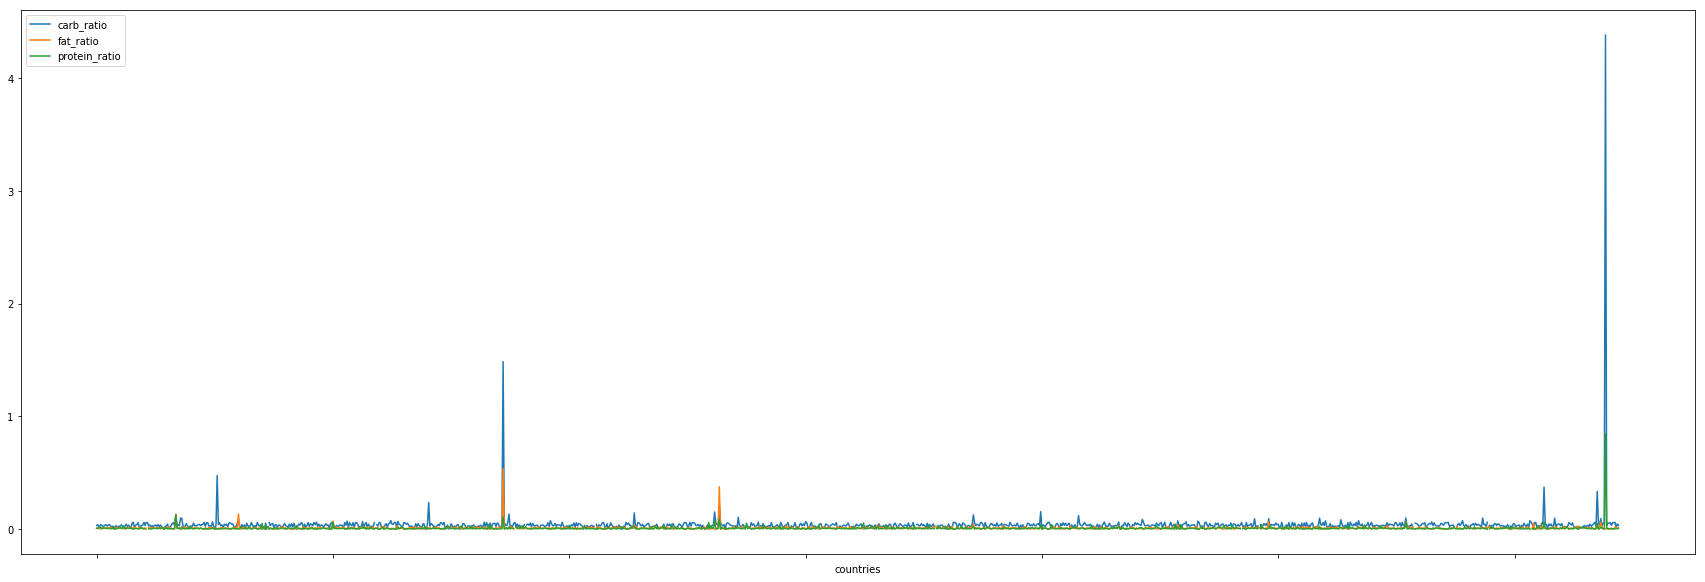

In [26]:
country_group = country_ratio.groupby('countries')
country_group.mean().plot(figsize=(30,10))

C. TEXT DATA

In [27]:
df.ingredients_text.value_counts()

Carbonated water, natural flavor.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [28]:
splited_ing = df.ingredients_text.str.split(',',expand=True)

In [29]:
splited_ing.dropna(how='all',inplace=True)
splited_ing

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
1,Bananas,vegetable oil (coconut oil,corn oil and/or palm oil) sugar,natural banana flavor.,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Peanuts,wheat flour,sugar,rice flour,tapioca starch,salt,leavening (ammonium bicarbonate,baking soda),soy sauce (water,soybeans,...,None,None,None,None,None,None,None,None,None,None
3,Organic hazelnuts,organic cashews,organic walnuts almonds,organic sunflower oil,sea salt.,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Organic polenta,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,Rolled oats,grape concentrate,expeller pressed canola oil,sunflower seeds,almonds,walnuts oat bran,sesame seeds,cashews,natural vitamin e.,None,...,None,None,None,None,None,None,None,None,None,None
6,Organic long grain white rice,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,Org oats,org hemp granola (org oats,evaporated cane juice,org expeller-pressed canola oil,crispy rice [org brown rice flour,org evaporated cane juice,org molasses,sea salt],org flax seeds,org oat solids,...,None,None,None,None,None,None,None,None,None,None
8,Organic chocolate liquor,organic raw cane sugar,organic cocoa butter,organic unrefined whole cane sugar,organic ground vanilla beans.,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,Organic expeller pressed,refined high oleic sunflower oil,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
10,Organic adzuki beans,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [31]:
splited_ing.stack().value_counts()

 salt                                                                                                                                                                                                                     82540
 sugar                                                                                                                                                                                                                    52202
 water                                                                                                                                                                                                                    48325
 sel                                                                                                                                                                                                                      39850
 sucre                                                                                                  

The five most common ingredients are sugar, salt, water, citric acid, niacin.

D. TIME-SERIES ANALYSIS

In [117]:
created_datetime = df['created_datetime']

In [118]:
c = created_datetime.str.replace('T',' ')

In [119]:
c = c.str.strip('Z')

In [120]:
last_modified_datetime = df['last_modified_datetime']

In [121]:
l = last_modified_datetime.str.replace('T',' ')
l=l.str.strip('Z')

In [122]:
c  = pd.to_datetime(c,errors='coerce')

In [123]:
c.drop(index = c[c.isnull()].index, inplace=True)

In [124]:
l = pd.to_datetime(l,errors='coerce')
l.drop(index = l[l.isnull()].index, inplace = True)

In [125]:
delta = l-c

Mean time difference between create time and modified time

In [126]:
delta.mean()

Timedelta('108 days 03:35:07.638426')

In [127]:
c.sort_values(ascending=True)

272973   2012-01-31 14:43:58
193716   2012-02-09 10:34:56
222043   2012-02-11 14:51:07
201869   2012-02-11 18:51:58
333186   2012-02-11 20:46:21
191439   2012-02-11 21:11:15
196094   2012-02-12 08:32:47
321122   2012-02-12 08:51:55
268263   2012-02-12 18:01:45
268236   2012-02-12 18:22:16
268256   2012-02-12 19:47:39
268244   2012-02-12 20:07:15
217678   2012-02-15 21:32:35
253604   2012-02-15 22:02:08
331859   2012-03-12 18:50:07
224962   2012-03-17 15:39:23
211486   2012-03-17 15:49:45
197085   2012-03-17 19:27:02
262148   2012-03-17 21:45:03
224960   2012-03-18 12:16:58
234070   2012-03-18 12:31:03
234072   2012-03-18 12:47:47
222181   2012-03-18 13:03:18
222273   2012-03-18 13:25:59
212278   2012-03-18 13:31:46
275636   2012-03-18 14:44:11
268234   2012-03-18 14:53:35
268248   2012-03-18 14:58:05
268246   2012-03-18 15:01:34
268249   2012-03-18 15:12:37
                 ...        
178924   2017-09-17 19:38:15
249222   2017-09-17 19:39:09
329279   2017-09-17 19:39:50
178925   2017-

In [130]:
c.index = c

In [140]:
by_month = c.resample('M').count()
by_month

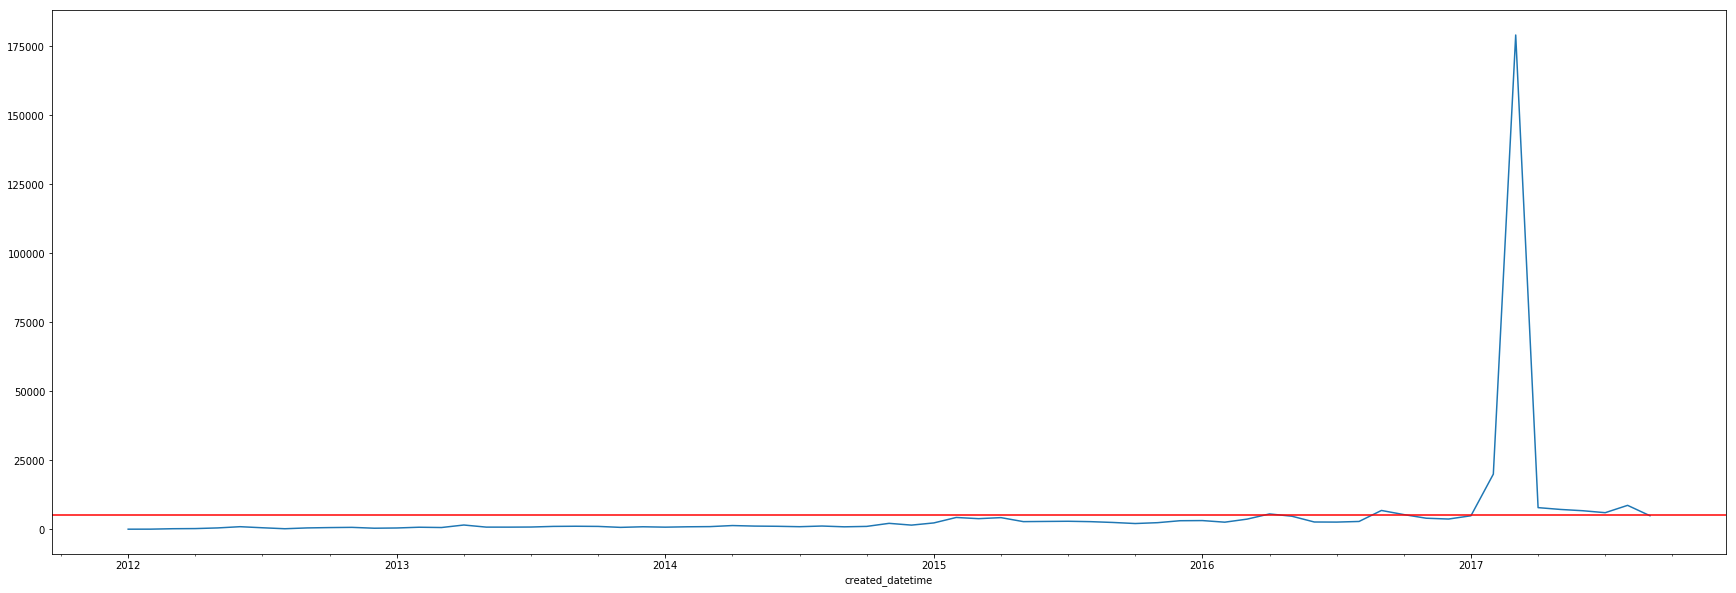

In [145]:
by_month.plot(figsize=(30,10))
plt.axhline(by_month.mean(),color='red')
plt.show()

E. Build a database

In [147]:
import sqlite3

In [148]:
db = sqlite3.connect("openfoodfacts.db")

Select part of dataframe from orginal df

In [207]:
df2 = df.loc[0:1000,['code','product_name','brands','countries','energy_100g']]
df2.loc[df2['code'].duplicated(),:]

,code,product_name,brands,countries,energy_100g


In [210]:
query = "CREATE TABLE food_facts (code TEXT PRIMARY KEY, product_name TEXT, brands TEXT, countries TEXT, energy_100g FLOAT);"

In [211]:
cursor = db.cursor()
cursor.execute(query)

In [212]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
results = cursor.fetchall()
print(results)

[('food_facts',)]


In [213]:
df2.to_sql(name='food_facts',con=db,if_exists='append',index=False)

In [214]:
pd.read_sql_query('SELECT * FROM food_facts;', db)

,code,product_name,brands,countries,energy_100g
0,0000000003087,Farine de blé noir,Ferme t'y R'nao,en:FR,NaN
1,0000000004530,Banana Chips Sweetened (Whole),None,US,2243.0
2,0000000004559,Peanuts,Torn & Glasser,US,1941.0
3,0000000016087,Organic Salted Nut Mix,Grizzlies,US,2540.0
4,0000000016094,Organic Polenta,Bob's Red Mill,US,1552.0
5,0000000016100,Breadshop Honey Gone Nuts Granola,Unfi,US,1933.0
6,0000000016117,Organic Long Grain White Rice,Lundberg,US,1490.0
7,0000000016124,Organic Muesli,Daddy's Muesli,US,1833.0
8,0000000016193,Organic Dark Chocolate Minis,Equal Exchange,US,2406.0
9,0000000016513,Organic Sunflower Oil,Napa Valley Naturals,US,3586.0


F. Finding Correlations

In [229]:
df3 = df.select_dtypes(include=['float64'])

In [230]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356027 entries, 0 to 356026
Data columns (total 20 columns):
additives_n                                283867 non-null float64
ingredients_from_palm_oil_n                283867 non-null float64
ingredients_that_may_be_from_palm_oil_n    283867 non-null float64
energy_100g                                295367 non-null float64
fat_100g                                   279497 non-null float64
saturated-fat_100g                         263823 non-null float64
trans-fat_100g                             143443 non-null float64
cholesterol_100g                           144170 non-null float64
carbohydrates_100g                         279220 non-null float64
sugars_100g                                279186 non-null float64
fiber_100g                                 220683 non-null float64
proteins_100g                              294161 non-null float64
salt_100g                                  289739 non-null float64
sodium_100g       

In [231]:
import seaborn as sns

In [227]:
non_null = df3.dropna(how='any')
non_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126114 entries, 1 to 356022
Data columns (total 20 columns):
additives_n                                126114 non-null float64
ingredients_from_palm_oil_n                126114 non-null float64
ingredients_that_may_be_from_palm_oil_n    126114 non-null float64
energy_100g                                126114 non-null float64
fat_100g                                   126114 non-null float64
saturated-fat_100g                         126114 non-null float64
trans-fat_100g                             126114 non-null float64
cholesterol_100g                           126114 non-null float64
carbohydrates_100g                         126114 non-null float64
sugars_100g                                126114 non-null float64
fiber_100g                                 126114 non-null float64
proteins_100g                              126114 non-null float64
salt_100g                                  126114 non-null float64
sodium_100g       

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


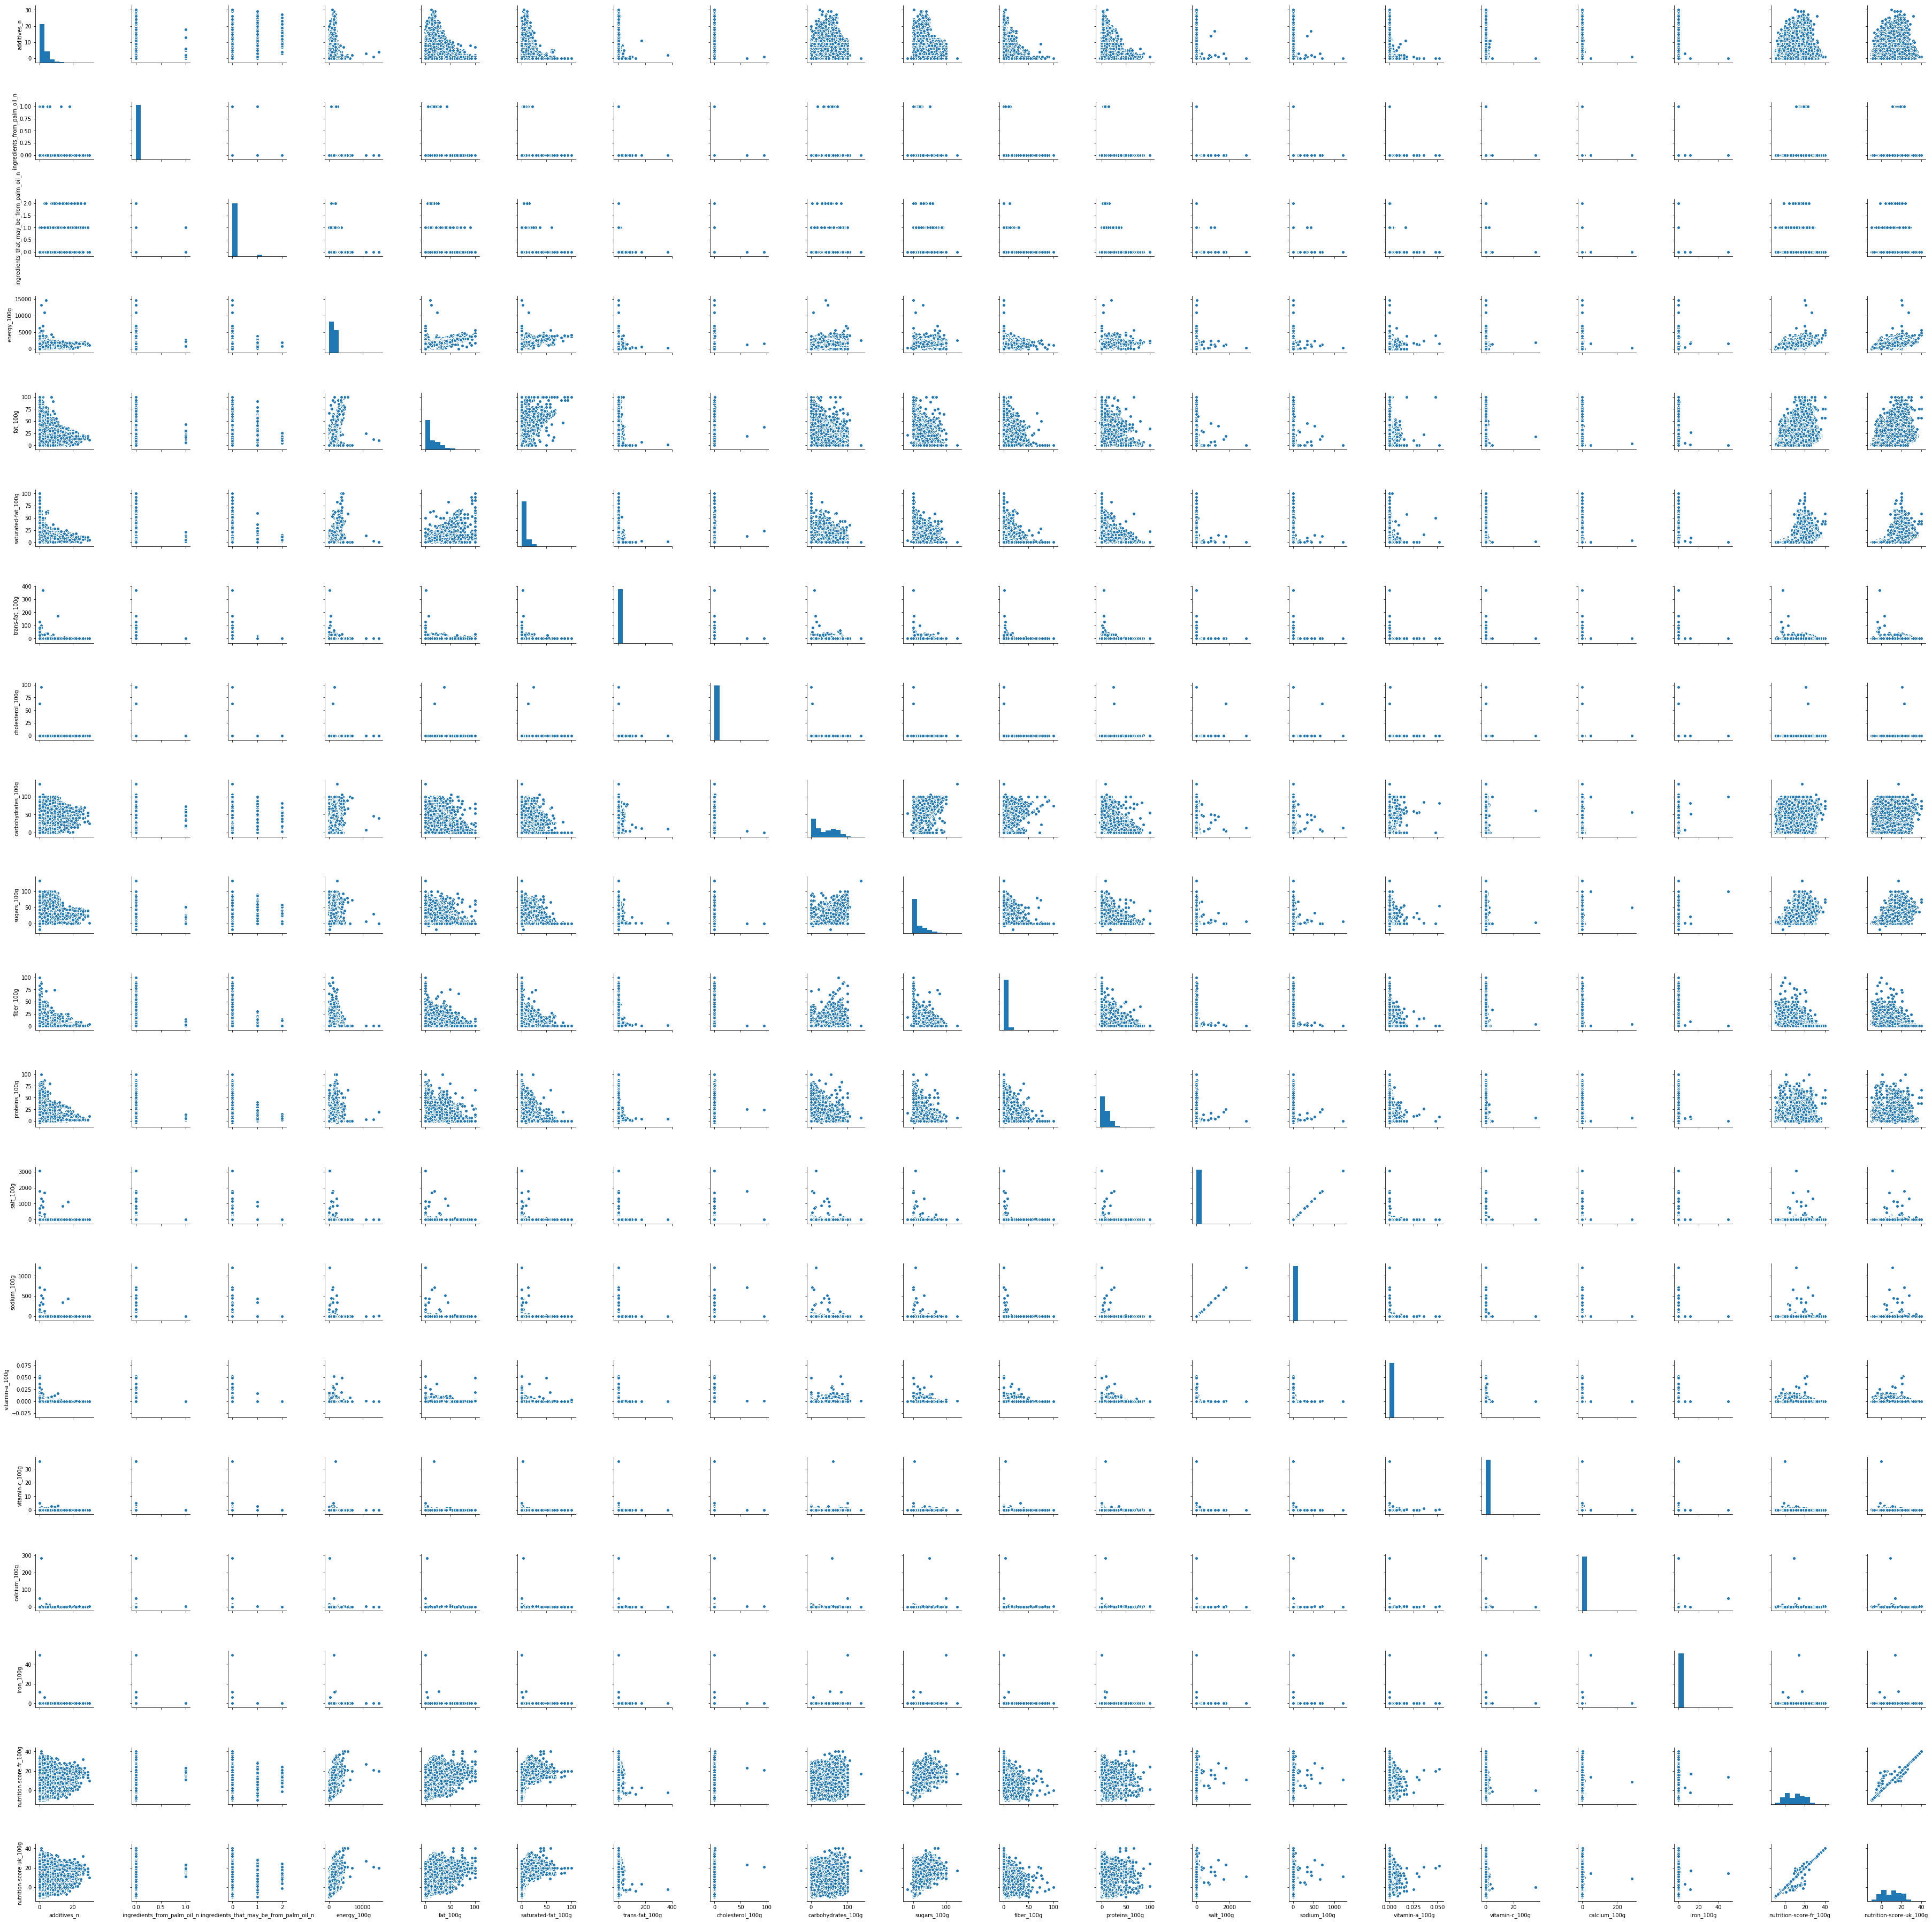

In [228]:
sns.pairplot(non_null)

By examining through the pairplot, we can exclude the items that have a straight line (horizonal or vertical) relationship with "nutrition_score_uk", and the remaining items that have a possible meaningful correlation with nutrition score are additives, energy, fat, saturated fat, fiber, proteins, sugars, carbohydrates. 

In [237]:
df3['nutrition-score-uk_100g'].corr(df3['additives_n'])

0.16373975981358882

In [238]:
df3['nutrition-score-uk_100g'].corr(df3['fat_100g'])

0.5960414850721297

In [239]:
df3['nutrition-score-uk_100g'].corr(df3['energy_100g'])

0.5663467124562299

In [240]:
df3['nutrition-score-uk_100g'].corr(df3['saturated-fat_100g'])

0.641135042109266

In [242]:
df3['nutrition-score-uk_100g'].corr(df3['fiber_100g'])

-0.0015525051176738303

In [243]:
df3['nutrition-score-uk_100g'].corr(df3['carbohydrates_100g'])

0.25776843291163887

In [244]:
df3['nutrition-score-uk_100g'].corr(df3['sugars_100g'])

0.4251474447334193

In [245]:
df3['nutrition-score-uk_100g'].corr(df3['proteins_100g'])

0.13101302174261598

food that contains higher amount of fat, energy, saturated fat, carbohydrates, sugars, and lower amount of fiber is usually given a higher nutrition score. The opposite renders lower nutrition score for the food. 